In [13]:
# Importamos las librerias, cargamos los datos y echamos un vistazo:
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import scipy.stats as st
import numpy as np
import seaborn as sns




ventas_am_uk = pd.read_csv('C:/Users/Ro/OneDrive/Escritorio/Datasets/amz_uk_price_prediction_dataset.csv/amz_uk_price_prediction_dataset.csv')
ventas_am_uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [10]:
# Hacemos un analisis cruzado entre la categoria y el mejor vendedor. ¿Existen categorías en las que ser un best-seller es más frecuente?
# Calcular la proporción de best-sellers para cada categoría y luego ordenar las categorías según esta proporción en orden descendente.)
# Para hacer crosstab debes "llamar" a pandas, no a al csv. 
proporciones = ventas_am_uk.groupby('category').agg(
    total_productos=('uid', 'count'),
    total_best_sellers=('isBestSeller', 'sum')
)
proporciones['proporcion_best_sellers'] = proporciones['total_best_sellers'] / proporciones['total_productos']
proporciones = proporciones.sort_values(by='proporcion_best_sellers', ascending=False)

proporciones

,total_productos,total_best_sellers,proporcion_best_sellers
category,,,
Grocery,9564,556,0.058135
Smart Home Security & Lighting,104,6,0.057692
Health & Personal Care,9569,552,0.057686
Mobile Phone Accessories,259,11,0.042471
Power & Hand Tools,8659,306,0.035339
...,...,...,...
Power Supplies,247,0,0.000000
Ski Helmets,254,0,0.000000
Ski Goggles,256,0,0.000000


In [11]:
# Test estadísticos: 
# Realice una prueba de chi-cuadrado para determinar si la distribución de los productos más vendidos es independiente de la categoría del producto.
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(proporciones)
chi2_statistic, chi2_p_value
 
# Calcule la V de Kramer para comprender la fuerza de la asociación entre el estado de los productos más vendidos y la categoría:
res = association(proporciones['total_productos'], proporciones['total_best_sellers'], method="cramer")


TypeError: association() got multiple values for argument 'method'

In [ ]:
# Visualizaciones:
# Crea una visualización que relacione la categoría y el mejor vendedor usando una stacked bar chart.
proporciones.plot(kind="bar", stacked=True)


C:\Users\Ro\AppData\Local\Temp\ipykernel_15488\4254036890.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='category', y='price', data=ventas_am_uk_top_20, palette="Set2")


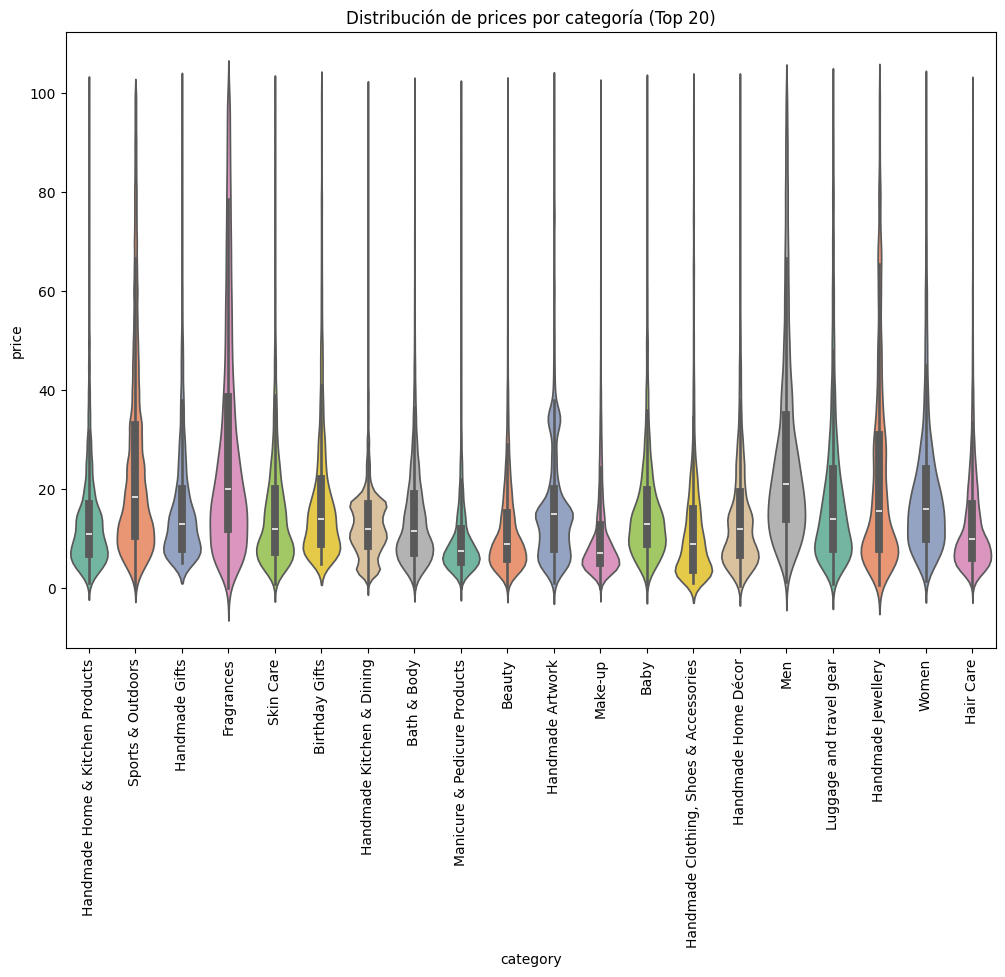

In [14]:
# Parte II: Exploracion de los price
#s y ratings (stars) a través de category' y marcas:
# 0) elimina valores atipicos: podemos utilizar el método IQR (rango intercuartil). Los productos con un price
# inferior al primer cuartil menos 1,5 veces el IQR o superior al tercer cuartil más 1,5 veces el IQR se considerarán valores atípicos y se eliminarán del conjunto de datos.

 
# 1) Haz una grafica de Violin para visualizar price
#s y category', filtra las 20 mejores opciones segun un recuento.
# ¿Que producto y/o category'tienen una mayor media de price
#s?
Q1 = ventas_am_uk['price'].quantile(0.25)
Q3 = ventas_am_uk['price'].quantile(0.75)
IQR = Q3 - Q1

# Definimos los límites inferior y superior para detectar los atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los valores que están fuera de esos límites
ventas_am_uk_filtrado = ventas_am_uk[(ventas_am_uk['price'] >= limite_inferior) & (ventas_am_uk['price'] <= limite_superior)]

# Filtramos las 20 categorías más frecuentes
top_20_category = ventas_am_uk_filtrado['category'].value_counts().head(20).index

# Filtramos el DataFrame para quedarnos solo con las 20 categorías más frecuentes
ventas_am_uk_top_20 = ventas_am_uk_filtrado[ventas_am_uk_filtrado['category'].isin(top_20_category)]

# Graficamos el gráfico de violín
plt.figure(figsize=(12, 8))
sns.violinplot(x='category', y='price', data=ventas_am_uk_top_20, palette="Set2")
plt.xticks(rotation=90)
plt.title('Distribución de prices por categoría (Top 20)')
plt.show()



In [ ]:
# 2) Crea una bar chart que compare el price
# de los 10 productos que mas se han comprado:
# ¿Que category'de producto obtuvo un mayor promedio de prices?
# Filtramos los 10 productos más vendidos
top_10_productos = ventas_am_uk_filtrado.groupby('category').sum().nlargest(10).index

# Filtrar el DataFrame para quedarnos solo con esos 10 productos
df_top_10_productos = ventas_am_uk_filtrado[ventas_am_uk_filtrado['category'].isin(top_10_productos)]

# Graficar el precio promedio de esos productos
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='price', data=df_top_10_productos, estimator='mean', palette='viridis')
plt.xticks(rotation=90)
plt.title('Precio promedio de los 10 productos más vendidos')
plt.show()



In [ ]:

# 3) Crea dos box plot que muestren la category'y los rating (stars). Filtra las 10 mejores usando un recuento. 
# ¿Que category'tiene una mayor calificacion media?
# Filtramos las 10 categorías más frecuentes en cuanto a recuento de productos
top_10_categorias_rating = ventas_am_uk_filtrado['categoria'].value_counts().head(10).index

# Filtrar el DataFrame para quedarnos con estas categorías
df_top_10_categorias_rating = ventas_am_uk_filtrado[ventas_am_uk_filtrado['categoria'].isin(top_10_categorias_rating)]

# Graficar el box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='categoria', y='rating', data=df_top_10_categorias_rating, palette="Set1")
plt.xticks(rotation=90)
plt.title('Distribución de ratings por categoría (Top 10)')
plt.show()


In [ ]:
# Parte III: Investiga sobre la conexion entre precios y rating (stars):
# 0) Calcula el coeficiente de correlacion entre precio y rating (stars):
# ¿Es una correlacion significante?:
correlacion = ventas_am_uk['price'].corr(ventas_am_uk['stars'])
print(f"Coeficiente de correlación entre precio y rating (stars): {correlacion}")

# 1) Usa un scatter plot para visualizar las relaciones entre rating (stars) y precio. ¿Hay algun patron?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='stars', y='price', data=ventas_am_uk)
plt.title('Relación entre Rating (Stars) y Precio')
plt.xlabel('Rating (Stars)')
plt.ylabel('Precio')
plt.show()

# Usa un heatmap para visualizar correlaciones entre todas las variables numericas.
# Se crea la correlacion:
corr_matrix = ventas_am_uk.corr()

# Crear un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlaciones')
plt.show()

# Usa QQ plot para ver si los precios siguen una distribucion normal. 
plt.figure(figsize=(8, 6))
stats.probplot(ventas_am_uk['price'], dist="norm", plot=plt)
plt.title('QQ Plot para Precios')
plt.show()